In [1]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler

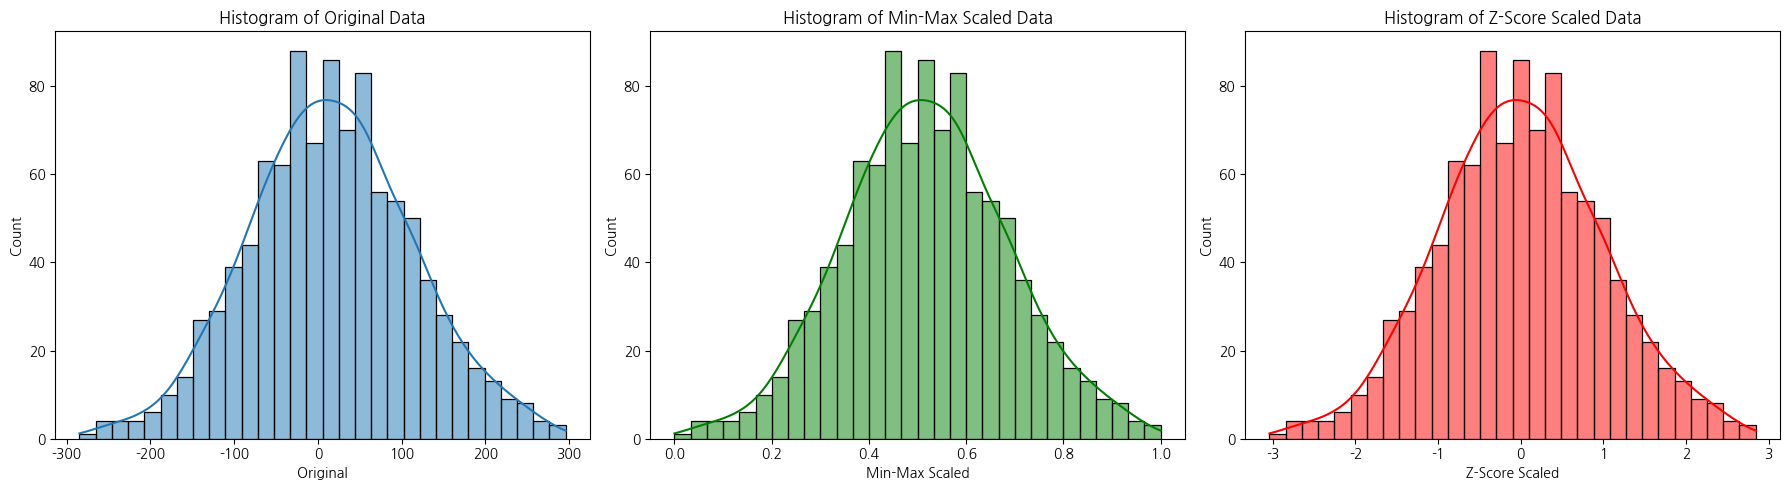

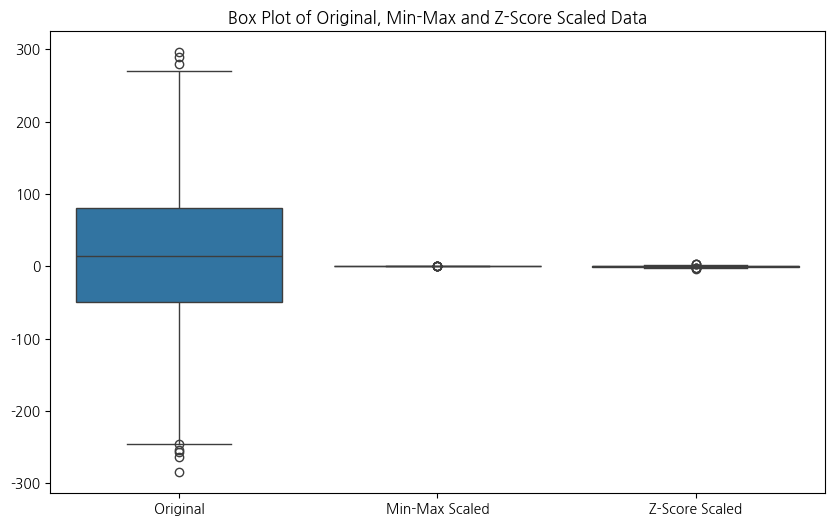

In [2]:
# 무작위 데이터 생성
np.random.seed(0)
data = np.random.randn(1000) * 100 + 20

# 데이터 프레임 생성
df = pd.DataFrame(data, columns=['Original'])

# Min-Max Scaling
scaler_min_max = MinMaxScaler()
df['Min-Max Scaled'] = scaler_min_max.fit_transform(df[['Original']])

# Z-Score Normalization
scaler_standard = StandardScaler()
df['Z-Score Scaled'] = scaler_standard.fit_transform(df[['Original']])

# 시각화
fig, ax = plt.subplots(1, 3, figsize=(18, 5))

# 원본 데이터 히스토그램
sns.histplot(df['Original'], bins=30, kde=True, ax=ax[0])
ax[0].set_title('Histogram of Original Data')

# Min-Max Scaled 데이터 히스토그램
sns.histplot(df['Min-Max Scaled'], bins=30, kde=True, ax=ax[1], color='green')
ax[1].set_title('Histogram of Min-Max Scaled Data')

# Z-Score Scaled 데이터 히스토그램
sns.histplot(df['Z-Score Scaled'], bins=30, kde=True, ax=ax[2], color='red')
ax[2].set_title('Histogram of Z-Score Scaled Data')

plt.tight_layout()
plt.show()

# 박스 플롯으로 시각화
plt.figure(figsize=(10, 6))
sns.boxplot(data=df)
plt.title('Box Plot of Original, Min-Max and Z-Score Scaled Data')
plt.show()

In [3]:
# 타이타닉 데이터를 통해 간단하게 살펴보자
tt = sns.load_dataset('titanic')

In [4]:
tt_sp =tt[['age','fare','survived']] # 타이타닉 데이터 중 필요한 컬럼만 추출

In [5]:
tt_sp['age'].fillna(tt_sp['age'].median(), inplace=True)
tt_sp['fare'].fillna(tt_sp['fare'].median(), inplace=True)

C:\Users\nampa\AppData\Local\Temp\ipykernel_2080\4185209618.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  tt_sp['age'].fillna(tt_sp['age'].median(), inplace=True)
C:\Users\nampa\AppData\Local\Temp\ipykernel_2080\4185209618.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tt_sp['age'].fillna(tt_sp['age'].median(), inplace=True)
C:\User

In [6]:
#결측치 대체 완료
tt_sp.isna().sum()

age         0
fare        0
survived    0
dtype: int64

In [7]:
# Min
min_max_scaler = MinMaxScaler()
tt_sp['age_mm'] = min_max_scaler.fit_transform(np.array(tt_sp['age']).reshape(-1,1))
tt_sp['fare_mm'] = min_max_scaler.fit_transform(np.array(tt_sp['fare']).reshape(-1,1))

# Z-score
standard_scaler= StandardScaler()
tt_sp['age_z'] = standard_scaler.fit_transform(np.array(tt_sp['age']).reshape(-1,1))
tt_sp['fare_z'] = standard_scaler.fit_transform(np.array(tt_sp['fare']).reshape(-1,1))

C:\Users\nampa\AppData\Local\Temp\ipykernel_2080\4111629460.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tt_sp['age_mm'] = min_max_scaler.fit_transform(np.array(tt_sp['age']).reshape(-1,1))
C:\Users\nampa\AppData\Local\Temp\ipykernel_2080\4111629460.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tt_sp['fare_mm'] = min_max_scaler.fit_transform(np.array(tt_sp['fare']).reshape(-1,1))
C:\Users\nampa\AppData\Local\Temp\ipykernel_2080\4111629460.py:8: SettingWithCopyWarning: 
A value is trying to be s

In [8]:
tt_sp

,age,fare,survived,age_mm,fare_mm,age_z,fare_z
0,22.0,7.2500,0,0.271174,0.014151,-0.565736,-0.502445
1,38.0,71.2833,1,0.472229,0.139136,0.663861,0.786845
2,26.0,7.9250,1,0.321438,0.015469,-0.258337,-0.488854
3,35.0,53.1000,1,0.434531,0.103644,0.433312,0.420730
4,35.0,8.0500,0,0.434531,0.015713,0.433312,-0.486337
...,...,...,...,...,...,...,...
886,27.0,13.0000,0,0.334004,0.025374,-0.181487,-0.386671
887,19.0,30.0000,1,0.233476,0.058556,-0.796286,-0.044381
888,28.0,23.4500,0,0.346569,0.045771,-0.104637,-0.176263
889,26.0,30.0000,1,0.321438,0.058556,-0.258337,-0.044381


Text(0.5, 1.0, 'z-score fare')

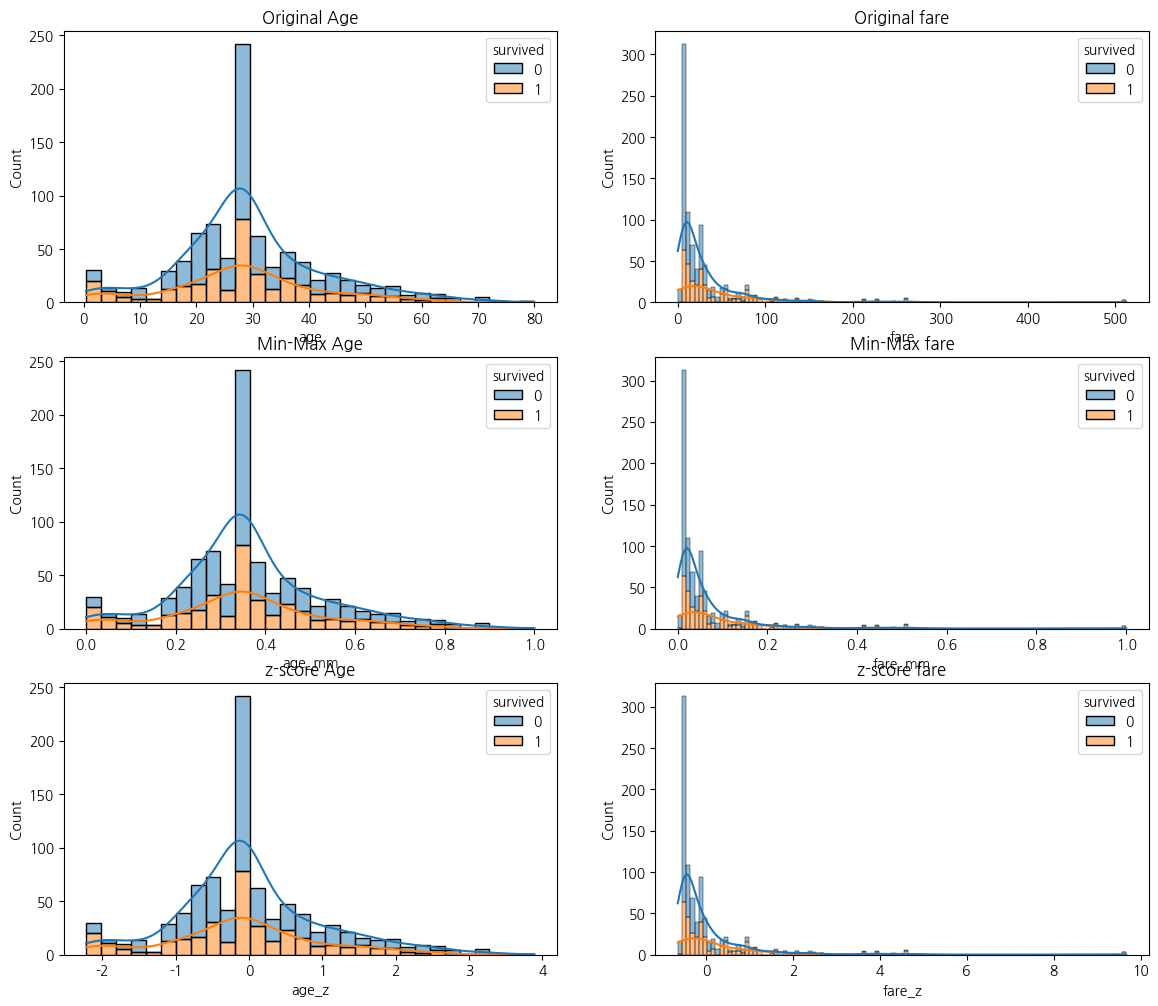

In [9]:
## 시각화를 위한 진행

fig, axes= plt.subplots(3,2, figsize=(14,12))
sns.histplot(tt_sp, x='age',hue='survived', multiple = 'stack', ax= axes[0,0],kde=True )
axes[0,0].set_title('Original Age')

sns.histplot(tt_sp, x='fare',hue='survived', multiple = 'stack', ax= axes[0,1],kde=True )
axes[0,1].set_title('Original fare')

sns.histplot(tt_sp, x='age_mm',hue='survived', multiple = 'stack', ax= axes[1,0],kde=True )
axes[1,0].set_title('Min-Max Age')

sns.histplot(tt_sp, x='fare_mm',hue='survived', multiple = 'stack', ax= axes[1,1],kde=True )
axes[1,1].set_title('Min-Max fare')


sns.histplot(tt_sp, x='age_z',hue='survived', multiple = 'stack', ax= axes[2,0],kde=True )
axes[2,0].set_title('z-score Age')

sns.histplot(tt_sp, x='fare_z',hue='survived', multiple = 'stack', ax= axes[2,1],kde=True )
axes[2,1].set_title('z-score fare')